In [1]:
from cymetric import convenient_interface as com
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

/opt/local/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/importlib/_bootstrap.py:222: QAWarning: pyne.data is not yet QA compliant.
  return f(*args, **kwds)
/opt/local/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/importlib/_bootstrap.py:222: QAWarning: pyne.material is not yet QA compliant.
  return f(*args, **kwds)
/opt/local/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/importlib/_bootstrap.py:222: QAWarning: pyne.enrichment is not yet QA compliant.
  return f(*args, **kwds)


In [2]:
import cymetric as cym
db = cym.dbopen('cyclus_600.sqlite')
ev = cym.Evaluator(db=db, write=False)

In [4]:
FBR_dr_trans = com.get_transaction_timeseries(ev, rec_list=['FBR_driver'])
FBR_dr_trans_LEU = com.get_transaction_timeseries(ev, rec_list=['FBR_driver'], commod_list=['FBR_LEU_N'] )
FBR_dr_trans_N = com.get_transaction_timeseries(ev, rec_list=['FBR_driver'], commod_list=['FBR_MOX_N'] )



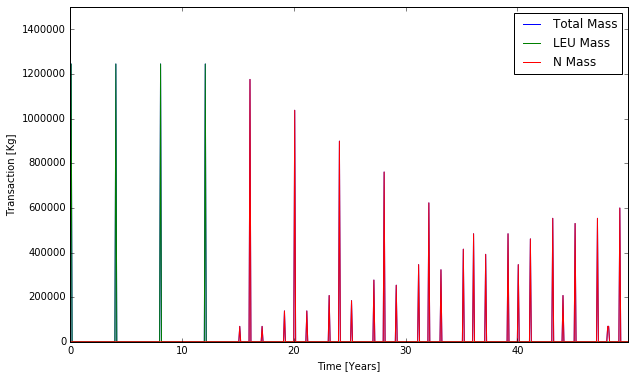

In [38]:
FBR_dr_trans_dat = pd.DataFrame({'Time': FBR_dr_trans.Time/12., 'Total Mass': FBR_dr_trans.Mass})
FBR_dr_trans_LEU_dat = pd.DataFrame({'Time': FBR_dr_trans_LEU.Time/12., 'LEU Mass': FBR_dr_trans_LEU.Mass})
FBR_dr_trans_N_dat = pd.DataFrame({'Time': FBR_dr_trans_N.Time/12., 'N Mass': FBR_dr_trans_N.Mass})


e1x = FBR_dr_trans_dat.plot(x='Time', y='Total Mass', figsize=(10, 6))
FBR_dr_trans_LEU_dat.plot(x='Time', y='LEU Mass', ax=e1x)
FBR_dr_trans_N_dat.plot(x='Time', y='N Mass', ax=e1x)



plt.ylim([0,1500000])
plt.xlabel('Time [Years]')
plt.ylabel('Transaction [Kg]')
plt.savefig('trans.png', dpi=326)


In [23]:
FAB_pwr = com.get_transaction_timeseries(ev, rec_list=['FAB'], commod_list=['pwr_tru_str'] )
FAB_blanket = com.get_transaction_timeseries(ev, rec_list=['FAB'], commod_list=['blk_tru_str'] )



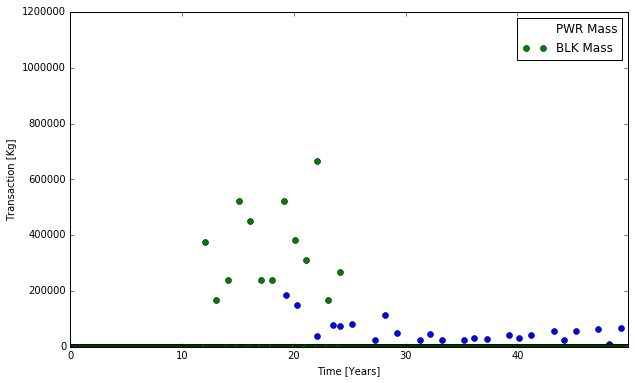

In [24]:
FAB_pwr_dat = pd.DataFrame({'Time': FAB_pwr.Time/12., 'PWR Mass': FAB_pwr.Mass})
FAB_blanket_dat = pd.DataFrame({'Time': FAB_blanket.Time/12., 'BLK Mass': FAB_blanket.Mass})


e1x = FAB_pwr_dat.plot(x='Time', y='PWR Mass', figsize=(10, 6), linestyle=' ', marker='o')
FAB_blanket_dat.plot(x='Time', y='BLK Mass', ax=e1x, marker='o', linestyle=' ')



plt.ylim([0,1200000])
plt.xlabel('Time [Years]')
plt.ylabel('Transaction [Kg]')
plt.savefig('trans.png', dpi=326)

In [25]:
sep_inv_N_2 = com.get_inventory_timeseries(ev, fac_list=['Storage_pwr_tru'])


/Users/mouginot/.local/lib/python3.5/site-packages/cymetric/convenient_interface.py:329: UserWarning: no nuclide provided
  warnings.warn(wng_msg, UserWarning)


In [26]:
sep_inv_N_3 = com.get_inventory_timeseries(ev, fac_list=['Storage_blk_tru'])


/Users/mouginot/.local/lib/python3.5/site-packages/cymetric/convenient_interface.py:329: UserWarning: no nuclide provided
  warnings.warn(wng_msg, UserWarning)


In [27]:
sep_inv_N = com.get_inventory_timeseries(ev, fac_list=['SEP'])


/Users/mouginot/.local/lib/python3.5/site-packages/cymetric/convenient_interface.py:329: UserWarning: no nuclide provided
  warnings.warn(wng_msg, UserWarning)


In [28]:
blk_inv = com.get_inventory_timeseries(ev, fac_list=['Storage_blk_tru'])

/Users/mouginot/.local/lib/python3.5/site-packages/cymetric/convenient_interface.py:329: UserWarning: no nuclide provided
  warnings.warn(wng_msg, UserWarning)


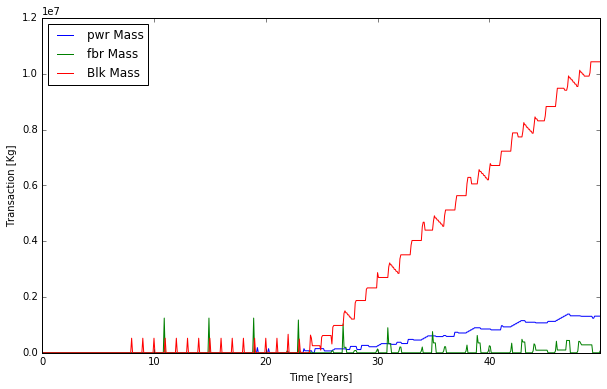

In [35]:
sep_inv_N2_dat = pd.DataFrame({'Time': sep_inv_N_2.Time/12., 'pwr Mass': sep_inv_N_2.Quantity})
sep_inv_N_dat =  pd.DataFrame({'Time': sep_inv_N.Time/12., 'fbr Mass': sep_inv_N.Quantity})
blk_inv_dat =  pd.DataFrame({'Time': sep_inv_N.Time/12., 'Blk Mass': blk_inv.Quantity})



e1x = sep_inv_N2_dat.plot(x='Time', y='pwr Mass', figsize=(10, 6))
sep_inv_N_dat.plot(x='Time', y='fbr Mass', ax=e1x)
blk_inv_dat.plot(x='Time', y='Blk Mass', ax=e1x)





plt.ylim([0,12000000])
plt.xlabel('Time [Years]')
plt.ylabel('Transaction [Kg]')
plt.savefig('inv.png', dpi=326)

In [15]:
power = com.get_power_timeseries(ev, fac_list=['PWR', 'FBR_driver'])

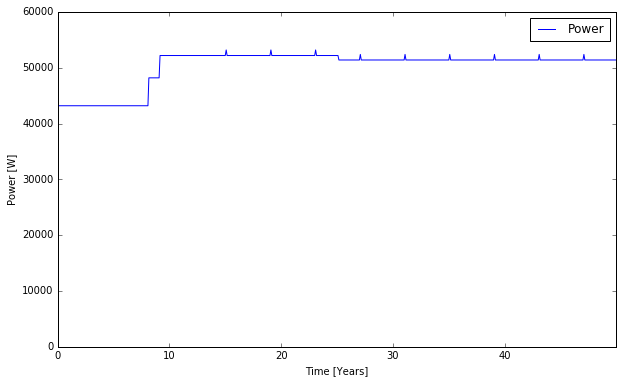

In [16]:
power_dat = pd.DataFrame({'Time': power.Time/12., 'Power': power.Value})



e1x = power_dat.plot(x='Time', y='Power', figsize=(10, 6))




#plt.ylim([0,1000000])
plt.xlabel('Time [Years]')
plt.ylabel('Power [W]')
plt.savefig('power.png', dpi=326)